#Creating a model to predict leads based on bid level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance 
import numpy as np
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn import metrics

In [2]:
#load in 2 dataframes
df1= pd.read_csv('Zeel_ConversionActions.csv',skiprows=2,index_col='Day',parse_dates=True)
df2= pd.read_csv('Zeel_RegularStats.csv',skiprows=2,index_col='Day',parse_dates=True)

In [3]:
#combine dataframes
df=df1.merge(df2,on=['Day','Campaign'])

In [4]:
df.columns.tolist()

['Campaign',
 'Path - Android App Install_All conv.',
 'Path - Corporate Inquiry – Contact_All conv.',
 'Path - Corporate – Booking_All conv.',
 'Path - CurrentCustomer – Booking_All conv.',
 'Path - Email Capture (No Password)_All conv.',
 'Path - Gift Card – Booking_All conv.',
 'Path - NetNewCustomer – Booking_All conv.',
 'Path - UpgradingCustomer – Booking_All conv.',
 ' Clicks ',
 ' Impressions ',
 ' Cost ',
 ' Avg. position ',
 ' Conversions ',
 'Search Impr. share',
 'index']

In [5]:
df.dtypes

Campaign                                        object
Path - Android App Install_All conv.             int64
Path - Corporate Inquiry – Contact_All conv.     int64
Path - Corporate – Booking_All conv.             int64
Path - CurrentCustomer – Booking_All conv.       int64
Path - Email Capture (No Password)_All conv.     int64
Path - Gift Card – Booking_All conv.             int64
Path - NetNewCustomer – Booking_All conv.        int64
Path - UpgradingCustomer – Booking_All conv.     int64
 Clicks                                          int64
 Impressions                                     int64
 Cost                                            int64
 Avg. position                                   int64
 Conversions                                     int64
Search Impr. share                              object
index                                            int64
dtype: object

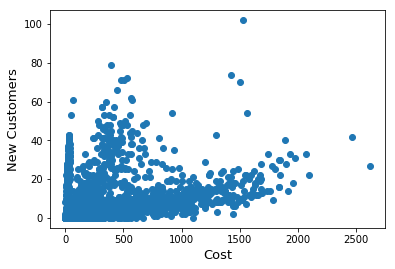

In [6]:
fig, ax = plt.subplots()
ax.scatter(df[' Cost '], df[' Conversions '])
plt.ylabel('New Customers', fontsize=13)
plt.xlabel('Cost', fontsize=13)
plt.show()

In [7]:
#clean data
df['Path - NetNewCustomer – Booking_All conv.'] = pd.to_numeric(df['Path - NetNewCustomer – Booking_All conv.'],errors='coerce')
df[' Clicks '] = pd.to_numeric(df[' Clicks '],errors='coerce')
df[' Impressions '] = pd.to_numeric(df[' Impressions '],errors='coerce')
df['Search Impr. share'] = pd.to_numeric(df['Search Impr. share'],errors='coerce')
df[' Conversions '] = pd.to_numeric(df[' Conversions '],errors='coerce')
df[' Cost '] = pd.to_numeric(df[' Cost '],errors='coerce')


df = df[(df[' Conversions '] > 0) & (df[' Cost '] > 100)]

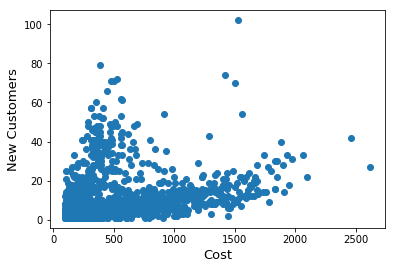

In [8]:
fig, ax = plt.subplots()
ax.scatter(df[' Cost '], df[' Conversions '])
plt.ylabel('New Customers', fontsize=13)
plt.xlabel('Cost', fontsize=13)
plt.show()

In [9]:
#Removing certain attributes

df = df[~df["Campaign"].str.contains("Brand", na=False)]
df = df[~df["Campaign"].str.contains("YouTube", na=False)]
df = df[~df["Campaign"].str.contains("GDN", na=False)]
df = df[~df["Campaign"].str.contains("Croud", na=False)]
df = df[~df["Campaign"].str.contains("Display", na=False)]

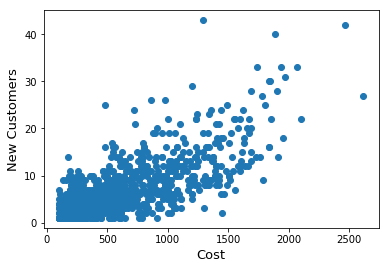

In [10]:
fig, ax = plt.subplots()
ax.scatter(df[' Cost '], df[' Conversions '])
plt.ylabel('New Customers', fontsize=13)
plt.xlabel('Cost', fontsize=13)
plt.show()

In [11]:
#creating new columns
df['CPA']=df[' Cost ']/df[' Conversions ']
df['CTR']=df[' Clicks ']/df[' Impressions ']
df['CPC']=df[' Cost ']/df[' Clicks ']

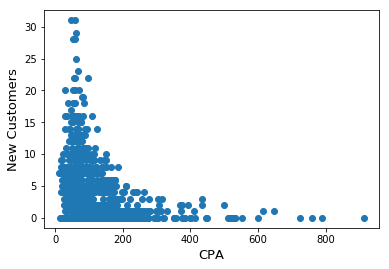

In [12]:
fig, ax = plt.subplots()
ax.scatter(df['CPA'], df['Path - NetNewCustomer – Booking_All conv.'])
plt.ylabel('New Customers', fontsize=13)
plt.xlabel('CPA', fontsize=13)
plt.show()

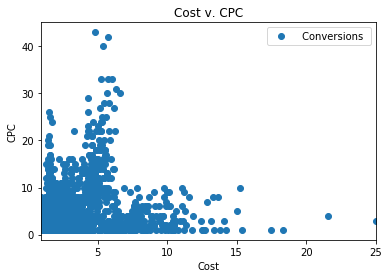

In [13]:
df.plot(x='CPC', y=' Conversions ', style='o')  
plt.title('Cost v. CPC')  
plt.xlabel('Cost')  
plt.ylabel('CPC')  
plt.show()

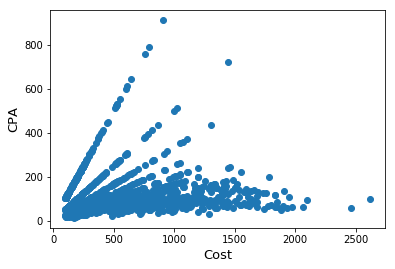

In [14]:
fig, ax = plt.subplots()
ax.scatter(df[' Cost '], df['CPA'])
plt.ylabel('CPA', fontsize=13)
plt.xlabel('Cost', fontsize=13)
plt.show()

In [15]:
#More cleaning
df = df[(df['CPA'] < 250)]

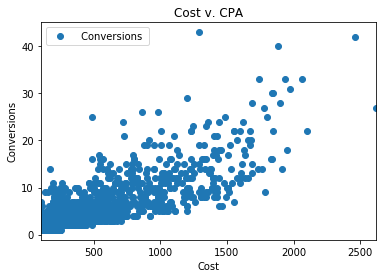

In [16]:
df.plot(x=' Cost ', y=' Conversions ', style='o')  
plt.title('Cost v. CPA')  
plt.xlabel('Cost')  
plt.ylabel('Conversions')  
plt.show()

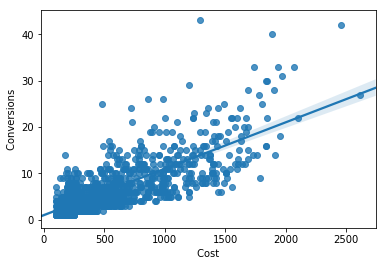

In [17]:
sns.regplot(x=" Cost ", y=" Conversions ", data=df);

In [18]:
df.describe()

,Path - Android App Install_All conv.,Path - Corporate Inquiry – Contact_All conv.,Path - Corporate – Booking_All conv.,Path - CurrentCustomer – Booking_All conv.,Path - Email Capture (No Password)_All conv.,Path - Gift Card – Booking_All conv.,Path - NetNewCustomer – Booking_All conv.,Path - UpgradingCustomer – Booking_All conv.,Clicks,Impressions,Cost,Avg. position,Conversions,Search Impr. share,index,CPA,CTR,CPC
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,0.0,1135.000000,1135.000000,1135.000000,1135.000000
mean,0.176211,0.447577,0.113656,0.912775,11.864317,0.104846,2.929515,0.146256,193.229075,4537.343612,548.539207,1.992070,6.497797,NaN,2524.814978,100.671021,0.055935,3.807853
std,0.458852,1.243903,0.597126,1.976575,16.807267,0.409890,4.526267,0.590729,149.907339,4609.111227,437.261324,0.495952,5.656367,NaN,1367.354912,52.177468,0.035225,2.699019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,93.000000,101.000000,1.000000,1.000000,NaN,2.000000,12.214286,0.011924,0.911894
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,1692.500000,207.000000,2.000000,3.000000,NaN,1405.500000,59.522727,0.029525,1.837344
50%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,169.000000,2871.000000,402.000000,2.000000,5.000000,NaN,2525.000000,90.000000,0.041133,2.857143
75%,0.000000,0.000000,0.000000,1.000000,19.000000,0.000000,4.000000,0.000000,268.000000,4561.000000,780.500000,2.000000,8.000000,NaN,3660.500000,132.000000,0.071903,4.997951
max,4.000000,10.000000,9.000000,16.000000,89.000000,6.000000,31.000000,11.000000,831.000000,23054.000000,2617.000000,4.000000,43.000000,NaN,4945.000000,249.000000,0.245902,25.000000


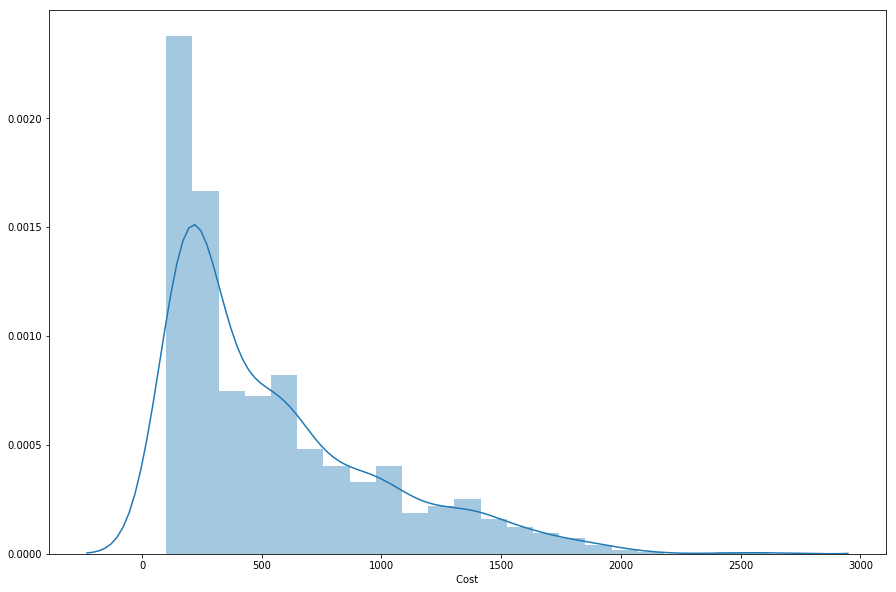

In [19]:
#Plot a histogram
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df[' Cost '])

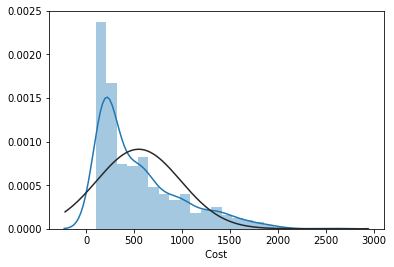

<Figure size 432x288 with 0 Axes>

In [20]:
sns.distplot(df[' Cost '], fit=norm);
fig = plt.figure()

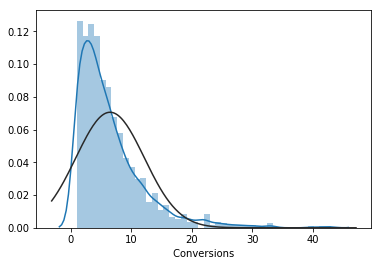

<Figure size 432x288 with 0 Axes>

In [21]:
sns.distplot(df[' Conversions '], fit=norm);
fig = plt.figure()

In [22]:
#Standardize the data
df[' Conversions '] = np.log(df[' Conversions '])
df[' Cost '] = np.log(df[' Cost '])

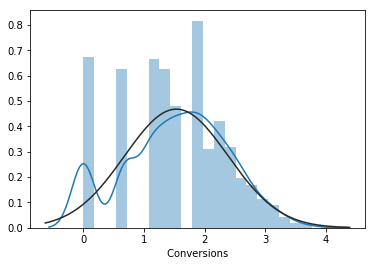

<Figure size 432x288 with 0 Axes>

In [23]:
sns.distplot(df[' Conversions '], fit=norm);
fig = plt.figure()

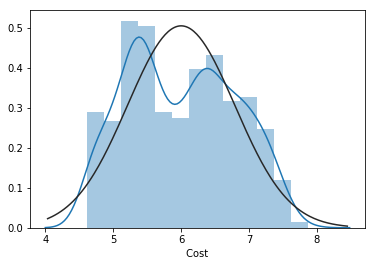

<Figure size 432x288 with 0 Axes>

In [24]:
sns.distplot(df[' Cost '], fit=norm);
fig = plt.figure()

In [25]:
#Reshape values to fit
X = df[' Cost '].values.reshape(-1,1)
y = df[' Conversions '].values.reshape(-1,1)

In [26]:
#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [27]:
lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
#Prints y intercept
print(lr.intercept_)

[-3.52577865]


In [29]:
print(lr.coef_)

[[0.84306114]]


In [30]:
y_pred = lr.predict(X_test)

In [31]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1.386294,1.837188
1,1.945910,1.985052
2,0.693147,1.197150
3,0.693147,1.221677
4,0.693147,1.288460
5,1.945910,1.998386
6,2.484907,1.892144
7,0.000000,0.906611
8,2.484907,2.296194
9,2.639057,1.759453


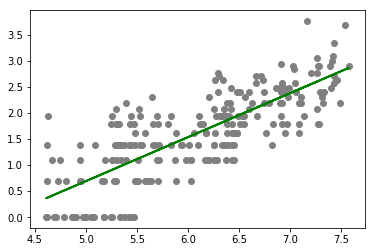

In [34]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='green', linewidth=2)
plt.show()

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred},index=['Index'])
df1 = df.head(25)

Exception: Data must be 1-dimensional

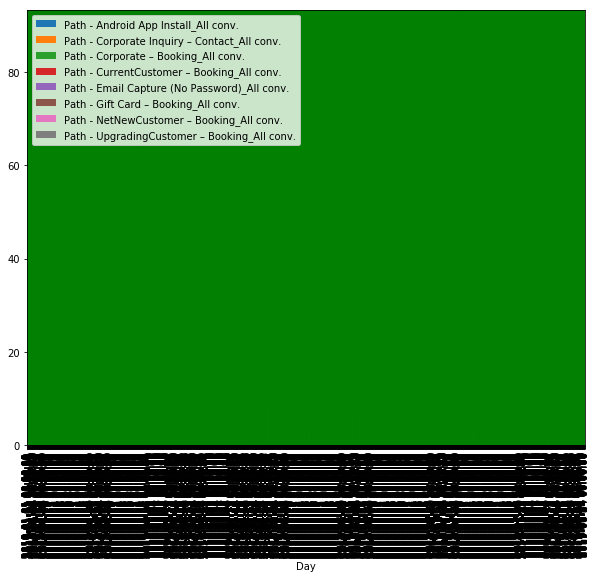

In [35]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.6494223317286565
Mean Squared Error: 16.14099693662084
Root Mean Squared Error: 4.017585958834091
